In [2]:
import pandas as pd


In [ ]:
DATA UNDERSTANDUNG
This data concerns employee salaries in several countries in the world which are calculated monthly every year.
Here it will be predicted what the lowest salary increase will be in the following year.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving salary_data.csv to salary_data.csv


In [6]:
data = pd.read_csv('salary_data.csv')

In [7]:
data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
4,American Samoa,Oceania,Monthly,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103


In [ ]:
DATA PREPARATION

In [ ]:
For Numeric Data :

In [8]:
data.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [ ]:
For Categoric data

In [9]:
data.describe(include=['O'])

,country_name,continent_name,wage_span
count,221,221,221
unique,221,9,1
top,Afghanistan,Africa,Monthly
freq,1,57,221


In [ ]:
Checking the missing values

In [10]:
data.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

In [ ]:
There is no missing values

In [ ]:
FINDING DATA INSIGHT

<Axes: >

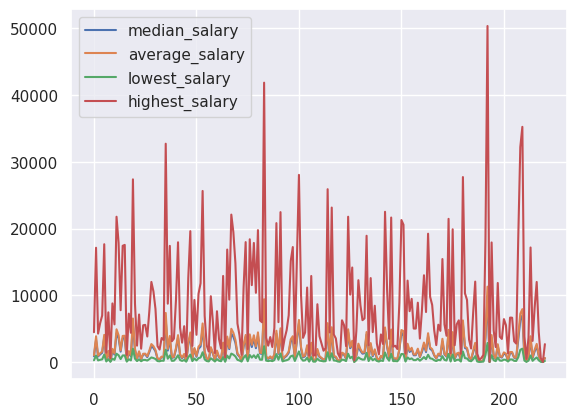

In [11]:
data.plot.line()

In [ ]:
From the data, it can be seen that there is a big difference between the lowest
and highest salaries. This may occur due to differences
 in the way wages are paid by each country in determining the class of work and the salary received.

<Axes: xlabel='highest_salary', ylabel='lowest_salary'>

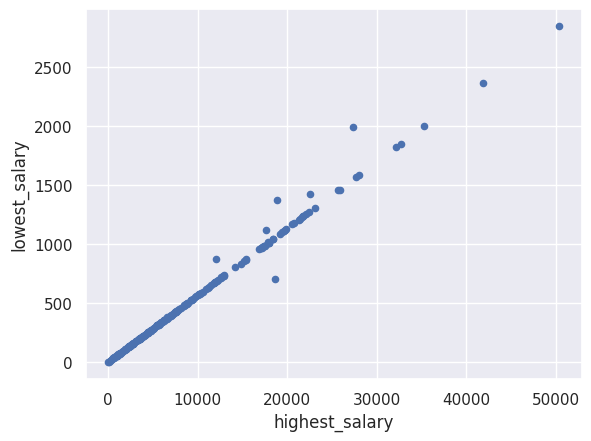

In [12]:
data.plot.scatter(x='highest_salary', y= 'lowest_salary'	)

In [ ]:
From the data, it can be seen that the relationship between the highest and lowest salary variables forms a linear
 pattern, although there is data that is slightly outside the line, but not too far away,
this shows that there is an influence where if the lowest salary trend increases, the highest salary also increases.

In [ ]:
DATA MANIPULATION

In [13]:
data.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [ ]:
It can be seen from each variable that the average value of
each data does not deviate too much from the standard deviation,
so it is considered that the data distribution is good and there is no need for data manipulation.

In [ ]:
MODELLING PREPARATION
Converting categorical data to numeric data

In [14]:
data['country_name'] = data['country_name'].astype('category')
data['country_name'] = data ['country_name'].cat.codes

In [15]:
data['continent_name'] = data['continent_name'].astype('category')
data['continent_name'] = data ['continent_name'].cat.codes

In [18]:
data['wage_span'] = data['wage_span'].astype('category')
data['wage_span'] = data ['wage_span'].cat.codes

In [19]:
data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,0,1,0,853.740000,1001.150000,252.530000,4460.970000
1,1,4,0,3319.240000,3858.350000,972.520000,17124.740000
2,2,4,0,832.840000,956.920000,241.220000,4258.490000
3,3,0,0,1148.840000,1308.810000,330.110000,5824.180000
4,4,7,0,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,216,5,0,2380.000000,2710.000000,680.000000,12000.000000
217,217,0,0,908.560000,1011.670000,254.860000,4503.890000
218,218,1,0,120.980000,133.360000,33.620000,594.930000
219,219,0,0,0.261335,0.285524,0.072092,1.271103


In [ ]:
MODELLING

In [20]:
data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,0,1,0,853.740000,1001.150000,252.530000,4460.970000
1,1,4,0,3319.240000,3858.350000,972.520000,17124.740000
2,2,4,0,832.840000,956.920000,241.220000,4258.490000
3,3,0,0,1148.840000,1308.810000,330.110000,5824.180000
4,4,7,0,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,216,5,0,2380.000000,2710.000000,680.000000,12000.000000
217,217,0,0,908.560000,1011.670000,254.860000,4503.890000
218,218,1,0,120.980000,133.360000,33.620000,594.930000
219,219,0,0,0.261335,0.285524,0.072092,1.271103


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train, test = train_test_split(data, test_size=0.3, random_state=2021)

In [24]:
train.shape, test.shape

((154, 7), (67, 7))

In [25]:
x_train = train.drop(['lowest_salary'], 1)
y_train = train['lowest_salary']

<ipython-input-25-322989968791>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop(['lowest_salary'], 1)


In [26]:
x_test = test.drop(['lowest_salary'], 1)
y_test = test['lowest_salary']

<ipython-input-26-213c53efaba1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop(['lowest_salary'], 1)


In [ ]:
predictor = x, target = y

In [27]:
lr = LinearRegression()


In [28]:
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
c = lr.intercept_

In [30]:
c

-1.739509089604951

In [31]:
lr.coef_

array([ 0.00844455, -0.04615039,  0.        , -0.00973015,  1.2084836 ,
       -0.21305271])

In [ ]:
Therei seven coef because there is sven columns of variables. Then it will be
predicted what the lowest salary increase will be
if the highest salary value is increased

In [32]:
lr.predict(x_test[2:3])

array([75.00256849])

In [33]:
x_test[2:3]

,country_name,continent_name,wage_span,median_salary,average_salary,highest_salary
174,174,0,0,254.88163,298.78264,1329.8172


In [34]:
data.loc[174]

country_name       174.000000
continent_name       0.000000
wage_span            0.000000
median_salary      254.881630
average_salary     298.782640
lowest_salary       75.441552
highest_salary    1329.817200
Name: 174, dtype: float64

In [35]:
data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,0,1,0,853.740000,1001.150000,252.530000,4460.970000
1,1,4,0,3319.240000,3858.350000,972.520000,17124.740000
2,2,4,0,832.840000,956.920000,241.220000,4258.490000
3,3,0,0,1148.840000,1308.810000,330.110000,5824.180000
4,4,7,0,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,216,5,0,2380.000000,2710.000000,680.000000,12000.000000
217,217,0,0,908.560000,1011.670000,254.860000,4503.890000
218,218,1,0,120.980000,133.360000,33.620000,594.930000
219,219,0,0,0.261335,0.285524,0.072092,1.271103


In [ ]:
The country with serial number 174 is country_name Sao Tome and Principe
continent_name is Africahas, has the lowest salary of 75.441552
and in the future it turns out there will be
a decrease in salary 75.00256849, even though there is no change in the highest salary.
MODELLING EVALUATION

In [36]:
y_predict_train = lr.predict(x_train)

In [37]:
y_predict_train

array([2.82110351e+03, 1.85420376e+01, 1.56562642e+02, 4.94188152e+02,
       1.99673138e+02, 7.17267915e+02, 1.26903540e+03, 1.38869694e+02,
       1.32210933e+02, 1.99807341e+02, 1.13410067e+02, 6.04031470e+01,
       1.53137260e+02, 5.39632399e+02, 5.25861805e+02, 1.88262264e+02,
       7.17764022e+01, 6.98222233e+01, 1.02645328e+03, 4.67608596e+01,
       7.63616781e+01, 9.69692788e+02, 4.58534754e+02, 6.36264241e+02,
       5.84610524e+02, 9.78170866e+02, 1.10441758e+03, 5.83098443e+02,
       1.10351483e+02, 1.01166123e+03, 4.79021857e+02, 5.58192168e+02,
       3.50822817e+02, 5.57030681e+01, 8.28539559e+02, 1.10835267e+02,
       2.17218878e+02, 3.15335158e+02, 2.81220767e+02, 6.88073707e+02,
       1.58847647e+02, 3.34179857e+01, 9.80189067e+02, 1.17994040e+03,
       3.19234416e+02, 3.66204693e+02, 1.27368803e+01, 2.36535942e+03,
       1.00647689e+03, 4.82545872e+02, 1.28077874e+02, 7.17352393e+02,
       6.53792546e+01, 3.32900226e+01, 3.27925531e+02, 5.81386540e+01,
      

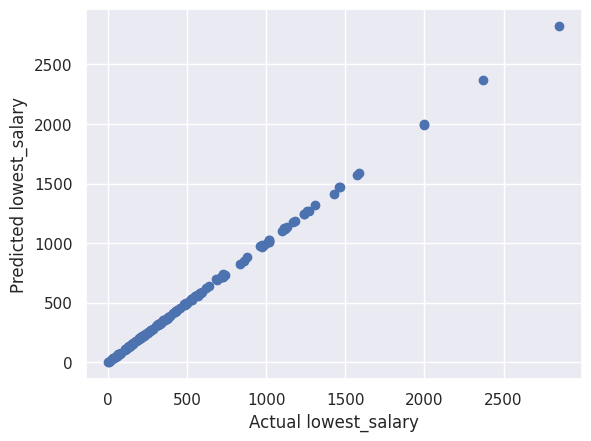

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_predict_train)
plt.xlabel('Actual lowest_salary')
plt.ylabel('Predicted lowest_salary')
plt.show()

In [ ]:
The data forms a perfect straight line and there is no data that is far from the linear line,
it can be said that the relationship between the variables x and y is very good.

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_train, y_predict_train)


0.9998850838664227

In [41]:
y_predict_test = lr.predict(x_test)

In [42]:
y_predict_test

array([ 810.6160988 ,  971.46807107,   75.00256849,   53.8290091 ,
        191.38120292,  249.35893367,  862.08595454,   39.31954358,
       1818.94419372,  420.9464847 , 1851.56893074,  222.03441942,
         94.36988141, 1209.63892525,  161.87226929, 1077.41891323,
       1357.08507952,   61.62880091,  285.33565948,  137.05054705,
       1113.92557515,   30.32864059,  158.01541186,  258.07431673,
        308.94507475,  398.01954452,  323.10975972,  685.02641267,
        433.05153937,  364.32015355,  244.79843919,  112.54144121,
        528.28394607,  293.18127822,  669.33703733, 1042.66614365,
        197.11687435,   73.82836015,   86.29085747, 1229.78658128,
        881.81154405,  317.89880214,   95.44653056,  346.38314199,
        500.81009614,  195.70748653,  254.27316906,  978.91366319,
        313.86327109,  143.37695359, 1055.61679365,  669.72215641,
        233.36212877,  575.806163  ,  394.65764889,  142.12517551,
        423.00644751,  400.79642235,  639.10240841,  665.92019

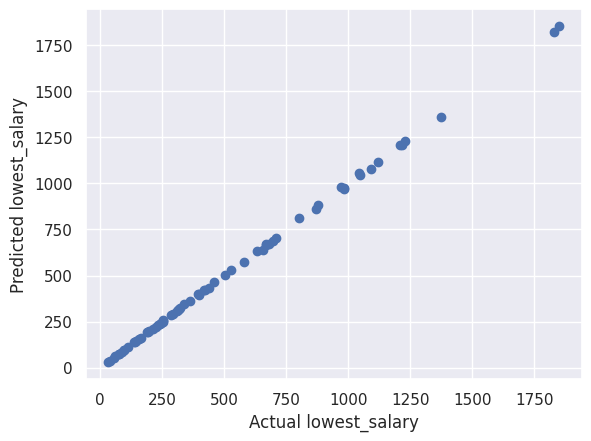

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict_test)
plt.xlabel('Actual lowest_salary')
plt.ylabel('Predicted lowest_salary')
plt.show()

In [ ]:
just like the test data, the train data also shows that the data forms a perfect
straight line and there is no data that is far from the linear line,
 it can be said that the relationship between the variables x and y is very good.

In [44]:
r2_score(y_test, y_predict_test)

0.9998281246938279

In [ ]:
r2 score is to show how close the data to regressin line that the
independent variable can explan with dependen variable,
in thi case variable lowest salary can be explain by variables country_name,
continent_name,	wage_span,	median_salary,	average_salary,	highest_salar.
The r2 score is between 0 to 1, if the score r2 model closer to 1 the model getting better,
if r2 score closer to 0 the model worst.
In this mode r2 score is 0.9998850838664227 for train data and 0.9998281246938279 for test data
 is perfectly close to 1, so this model acceptable and Good model.

In [ ]:
EXECUTIVE SUMMARY

Factors Influencing Wage And Salary Structure
The organization‘s ability to pay:
Wage increases should be given by those organizations which can afford them. Companies that have good sales
and therefore high profits tend to pay higher wages than those which are running at a loss or
earning low profits because of the high cost of production or low sales.

Supply and demand of labour:
If the demand and certain skills are high and the supply is low the result is
 rise in the price to be paid for these skills. The other alternative is to pay
 higher wages if the labour supply is scarce and lower wages when it is excessive.

The cost of living:
When the cost of living increases, workers and trade unions demand
 adjusted wages to offset the erosion of real wages. However, when living costs are stable
 or decline the management does not resort with this argument as a reason for wage reduction.

The living wage:
Employers feel that the level of living prescribed in workers
 budget is opened to argument since it is based on subjective opinion.

Job requirements:
Jobs are graded according to the relative skill
 responsibility and job conditions required.

Trade unions bargaining power:
Trade unions do affect the rate of wages. Generally the
stronger and more powerful trade union, higher the wages.

Productivity:
Productivity is another criterion and is measured in terms of output man-hour.
It is not due to labour efforts alone. Technological improvements, greater ingenuity and
skill by the labour are all responsible for the increase in productivity.

Prevailing market rate:
This is also known as ‗comparable wages‘or ‘going wage rate‘. Reason behind this is
 competition demand that competitors adhere to the same relative wage level.

Skill levels available in the market:
With the rapid growth of industries, business trade there is shortage of skilled resources.
 The technological development, automation has been affecting the skilled levels at a faster rate.

Psychological and social factors:
This determine in a significant measure how hard a person will work for the compensation
 received or what pressures he will exert to get his compensation increased.

 How to Handle Salary Reduction for Employees

Reducing an employee’s salary is not an easy decision to make. Unfortunately, salary reduction might be necessary.
If an employee is not succeeding in their position, it may be time for a pay cut.

A salary reduction is much more than just changing your payroll. There are laws you
 need to follow when reducing an employee’s salary. Learn more about salary reductions, reduction laws,
 and how to effectively communicate salary reductions to employees.

What is salary reduction?
A salary reduction, or pay cut, is when an employer lowers an employee’s salary amount for various reasons.

Reasons for a salary reduction
You may reduce an employee’s salary because of a decrease in sales or poor employee performance.

Many businesses find themselves struggling financially at some point. You may not be able to afford
to pay an employee at a higher salary rate if sales and profits have decreased.

To save money, you may implement a pay reduction, rather than laying off necessary employees.
Employees are generally not pleased about pay cuts, but may decide to keep their positions.

A salary decrease because of financial issues may not always be permanent. You can always revert
 employees to their previous salaries if profits increase.

The most common reason for a salary reduction is when an employee is demoted at work.
Demotion typically occurs when an employee demonstrates poor performance, or lack of skills, or when
a position is eliminated. You can give fewer responsibilities or demote the employee to another position entirely.

Although these are commons reasons why you may reduce pay, you sometimes don’t need a reason
to reduce an employee’s salary. For example, you may not need a reason to reduce an employee’s
 salary if employees are hired at will and don’t have a formal employee contract.

Salary reduction laws
There are several pay reduction laws you must follow as an employer.

You can give a salary reduction legally unless the following occurs:

No prior notification of the pay cut
The pay cut is discriminatory
There’s a contract stating otherwise
The pay cut is below minimum wage
A salary reduction can’t occur unless you notify the employee of the pay cut first.
 Inform employees of any salary reductions before changing their pay rate. If an employer cuts
 pay without notifying an employee, it can be considered a breach of contract,
 depending on if there’s a contract involved.

Businesses can’t target employees for salary reductions by age, race, gender, or religion.
 If an employer does, it’s discriminatory and not a legitimate reason for a salary reduction.
  Be sure to comply with equal employment opportunity laws if you reduce wages.

Employees with individual contracts or agreements (e.g., union contracts) are normally protected from
salary or wage reductions. It is illegal if an employer cuts pay for a contracted employee if
the contract explicitly states the salary can’t be reduced to a lower amount.

Employers can’t reduce wages to an amount lower than the state’s minimum wage.
Check with your state for your minimum wage rate before reducing salaries.
Salary reduction letter
To notify employees about upcoming salary changes, consider making your own salary reduction letter.

Include the date, employee’s name, reason for the salary reduction, and the effective
date on your salary cut letter. You may also want to include a section for the employee to
sign to show they understand the reason for the reduction.

Personally deliver the letter to the employee and discuss the reason for the salary reduction.
 Make sure to follow all pay reduction laws before informing your employee.


